# Lab-2

In [266]:
# 1. Зниження розмірності і візуалізація даних
# Застосуйте методи зниження розмірності sklearn.decomposition.PCA і sklearn.manifold.TSNE для візуалізації даних, з якими ви працювали в лабораторній № 1 (знижуючи розмірність до двох). Візуалізуйте результат.
# 2. Кластерний аналіз
# 1) За допомогою алгоритму k-means зробіть квантування зображення (видалення візуально надлишкової інформації) з глибиною 64, 32, 16 та 8 рівнів для будь-якого обраного самостійно зображення. Приклад: https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html
# 3. Обробка та класифікація текстових даних
# Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію), за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer). Проведіть класифікацію текстових даних, зробіть оцінку якості. 
# Текстові дані для аналізу можна обирати тут:
# https://analyticsindiamag.com/10-open-source-datasets-for-text-classification
# https://www.ics.uci.edu/~smyth/courses/cs175/text_data_sets.html
# https://medium.com/@ODSC/20-open-datasets-for-natural-language-processing-538fbfaf8e38
# https://odsc.medium.com/20-open-datasets-for-natural-language-processing-538fbfaf8e38
# https://imerit.net/blog/25-best-nlp-datasets-for-machine-learning-all-pbm/
# https://www.kaggle.com/
# або з будь-якого іншого джерела за вашим вибором
# (в разі великої кількості класів достатньо залишити 2-3)

# Датасет IMDB Movie Review Sentiment classification не обирайте

# Як звіт – робочий код в Jupyter notebook заливаєте на свій репозиторій на https://github.com/.
# Лінк відправляєте як відповідь до цього завдання.
# Максимальний бал – 10, 6 за роботу + 4 захист.
# Deadline 19.11.22 (захист роботи можна проводити ще протягм 2х тижнів після дедлайна), після цього терміну максимальний бал зменшується на 1 кожні 2 тижні


# (!) Однакові або дуже схожі роботи прийматися не будуть.

# Опис завантажених даних

In [267]:
# Історія набору даних:

# Інсульт – це медичний стан, при якому поганий кровообіг у мозку викликає загибель клітин. Існує два основних типи інсульту: ішемічний, спричинений недостатністю кровотоку, і геморагічний, спричинений кровотечею. Обидва призводять до того, що частини мозку перестають функціонувати належним чином. Ознаки та симптоми інсульту можуть включати нездатність рухатися або відчувати одну сторону тіла, проблеми з розумінням або розмовою, запаморочення або втрату зору на одну сторону. Ознаки та симптоми часто з’являються незабаром після інсульту. Якщо симптоми тривають менше однієї-двох годин, інсульт є транзиторною ішемічною атакою (ТІА), яку також називають міні-інсультом. Геморагічний інсульт також може супроводжуватися сильним головним болем. Симптоми інсульту можуть бути постійними. Довгострокові ускладнення можуть включати пневмонію та втрату контролю над сечовим міхуром.

# Основним фактором ризику інсульту є високий артеріальний тиск. Інші фактори ризику включають високий рівень холестерину в крові, куріння, ожиріння, цукровий діабет, перенесену в минулому ТІА, термінальну стадію захворювання нирок і фібриляцію передсердь. Ішемічний інсульт зазвичай спричинений закупоркою кровоносної судини, хоча існують і менш поширені причини. Геморагічний інсульт викликається кровотечею безпосередньо в мозок або в простір між оболонками головного мозку. Через розрив аневризми головного мозку може виникнути кровотеча. Діагноз зазвичай базується на фізичному огляді та підтверджується медичними зображеннями, такими як КТ або МРТ. КТ може виключити кровотечу, але не обов’язково виключити ішемію, яка на ранній стадії зазвичай не виявляється на КТ. Інші тести, такі як електрокардіограма (ЕКГ) і аналізи крові, проводяться для визначення факторів ризику та виключення інших можливих причин. Низький рівень цукру в крові може викликати подібні симптоми.

# Профілактика включає зменшення факторів ризику, хірургічне втручання для відкриття артерій до мозку в тих, хто має проблемне звуження сонної артерії, і варфарин у людей з фібриляцією передсердь. Для профілактики лікарі можуть рекомендувати аспірин або статини. Інсульт або ТІА часто потребують невідкладної допомоги. Ішемічний інсульт, якщо його виявлено протягом трьох-чотирьох з половиною годин, можна вилікувати за допомогою ліків, які можуть розщепити тромб. Деякі геморагічні інсульти допомагають від хірургічного втручання. Лікування, спрямоване на відновлення втраченої функції, називається реабілітацією після інсульту та в ідеалі проводиться в інсультному відділенні; однак вони недоступні в більшості країн світу.

# Інформація про атрибути
# 1) стать: «Чоловік», «Жінка» або «Інше»
# 2) вік: вік пацієнта
# 3) гіпертонія: 0, якщо у пацієнта немає гіпертонії, 1, якщо у пацієнта гіпертонія
# 4) захворювання серця: 0, якщо у пацієнта немає захворювань серця, 1 якщо у пацієнта є захворювання серця 5) був коли-небудь одружений: «Ні» або «Так»
# 6) тип роботи: «діти», «Державний», «Ніколи не працював», «Приватний» або «самозайнятий» 7) Тип проживання: «Сільський» або «Міський»
# 8) середній рівень глюкози: середній рівень глюкози в крові
# 9) ІМТ: індекс маси тіла
# 10) статус_куріння: «раніше курив», «ніколи не курив», «курить» або "Невідомо"*
# 11) штрих:1, якщо у пацієнта був інсульт, або 0, якщо ні

# *Примітка: «Невідомо» в smoking_status означає, що інформація для цього пацієнта недоступна

# Посилання на dataset

In [268]:
# Brain Stroke Dataset:
# https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

# Poem Classification Dataset:
# https://www.kaggle.com/datasets/ramjasmaurya/poem-classification-nlp?select=Poem_classification+-+train_data.csv

# Code

In [269]:
import re
import copy
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn import metrics
from skimage import io
from sklearn.utils import shuffle
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation


DATA_PATH = 'brain_stroke.csv'

dataset = pd.read_csv(DATA_PATH)
temp_detaset=copy.deepcopy(dataset)
display(dataset)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [270]:
display(dataset.info())
display(dataset.describe())
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


None

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [271]:
gender_type_labels = dataset['gender'].unique()
ever_married_type_labels = dataset['ever_married'].unique()
work_type_labels = dataset['work_type'].unique()
resident_type_labels = dataset['Residence_type'].unique()
smoking_status_labels = dataset['smoking_status'].unique()

print('Gender type values:', gender_type_labels)
print('Ever married type values:', ever_married_type_labels)
print('Work type values:', work_type_labels)
print('Residence type values:', resident_type_labels)
print('Smoking status values:', smoking_status_labels)

Gender type values: ['Male' 'Female']
Ever married type values: ['Yes' 'No']
Work type values: ['Private' 'Self-employed' 'Govt_job' 'children']
Residence type values: ['Urban' 'Rural']
Smoking status values: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [272]:
dataset['gender'] = dataset['gender'].map({'Female':1,'Male':0})
dataset['ever_married'] = dataset['ever_married'].map({'Yes': 1, 'No': 0})
dataset['work_type'] = dataset['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job':2, 'children':3})
dataset['Residence_type'] = dataset['Residence_type'].map({'Urban': 1, 'Rural':0})
dataset['smoking_status'] = dataset['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})

dataset.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,0,80.0,0,1,1,0,0,105.92,32.5,1,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2,1
3,1,79.0,1,0,1,1,0,174.12,24.0,1,1
4,0,81.0,0,0,1,0,1,186.21,29.0,0,1


# Dimensionality Reduction 

In [273]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns

In [274]:
X = dataset.drop(['stroke'], axis = 1)
y = dataset['stroke']

scaler = StandardScaler()
X_std=scaler.fit_transform(X)


In [275]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_std)
df_pca = pd.DataFrame(data = X_pca,columns = ['principal component 1', 'principal component 2'])
display(pd.concat([df_pca, dataset[['stroke']]], axis = 1))

,principal component 1,principal component 2,stroke
0,3.320322,3.185650,1
1,2.459885,2.217525,1
2,1.158758,-0.318111,1
3,1.992443,1.188731,1
4,2.229138,0.618921,1
...,...,...,...
4976,-0.164643,-0.425261,0
4977,0.828223,0.917489,0
4978,0.634128,0.657316,0
4979,0.234192,-0.148423,0


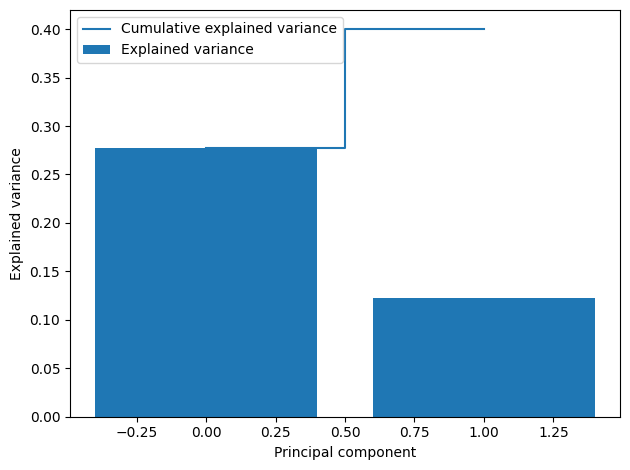

In [276]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

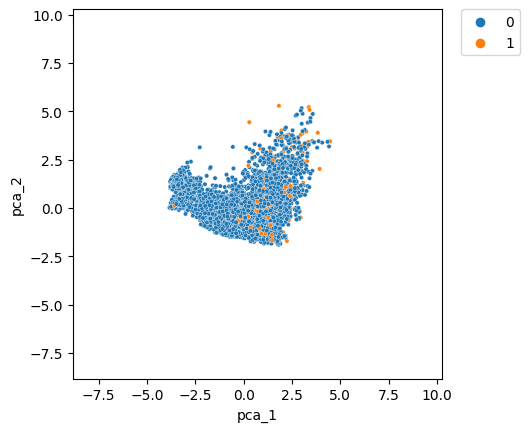

In [277]:
pca_result_df = pd.DataFrame({'pca_1': X_pca[:,0], 'pca_2': X_pca[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (X_pca.min()-5, X_pca.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [278]:
from sklearn.manifold import TSNE
tsne =TSNE(n_components = 2)

X_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data = X_tsne, columns =['principal component 1', 'principal component 2'])
display(pd.concat([df_tsne, dataset[['stroke']]], axis = 1))

/home/linux/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/linux/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,principal component 1,principal component 2,stroke
0,-71.017242,-44.747684,1
1,17.708799,-49.583366,1
2,-37.379120,-44.155090,1
3,-41.146614,-56.535442,1
4,-43.943439,-56.392467,1
...,...,...,...
4976,40.665443,32.121212,0
4977,-52.963688,-29.819279,0
4978,5.157699,-2.110176,0
4979,24.080267,16.067791,0


/home/linux/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/linux/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


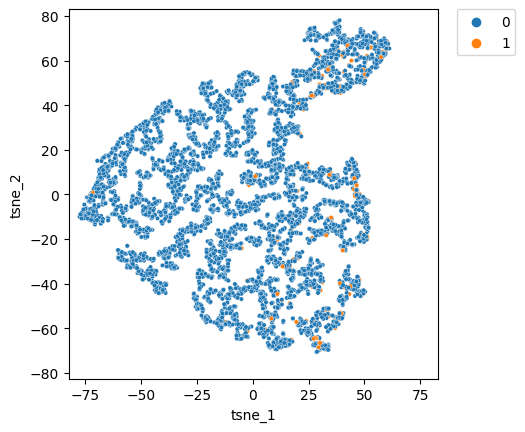

In [279]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10,cmap='viridis')
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# K-means Clustering

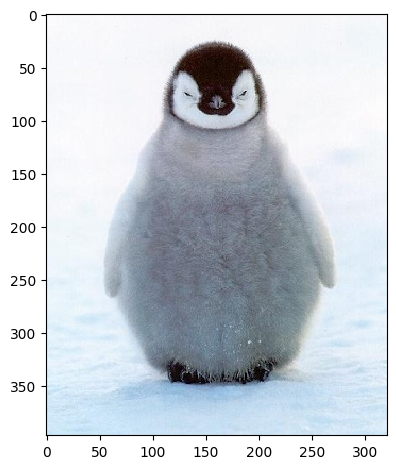

In [280]:
n_colors = [64, 32, 16, 8, 4, 2]
pic = io.imread("pingviin.jpg")

io.imshow(pic)
plt.show()


np_pic = np.array(pic, dtype=np.float64)/255
w, h, d = tuple(np_pic.shape)
assert d == 3
pic_array = np.reshape(np_pic, (w * h, d))

N of colors: 64
Image: 


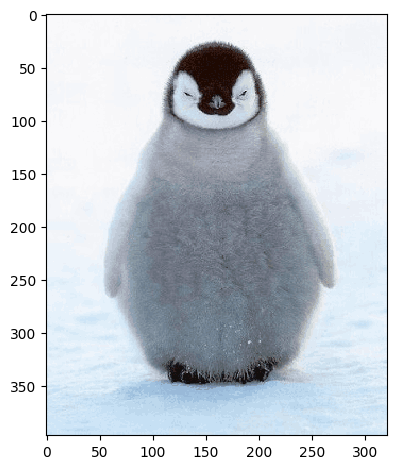

N of colors: 32
Image: 


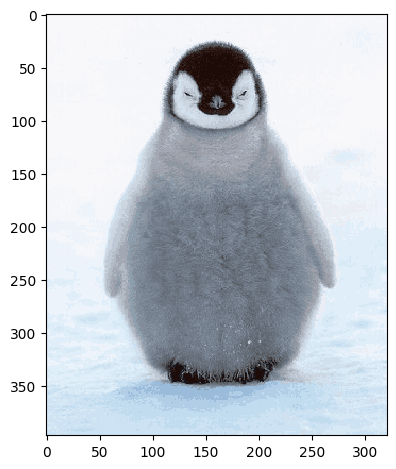

N of colors: 16
Image: 


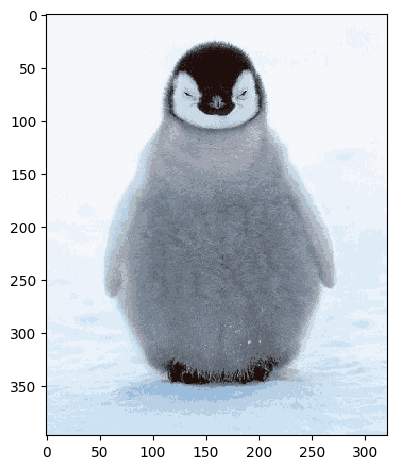

N of colors: 8
Image: 


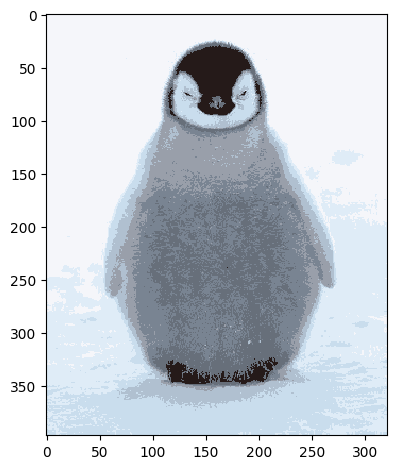

N of colors: 4
Image: 


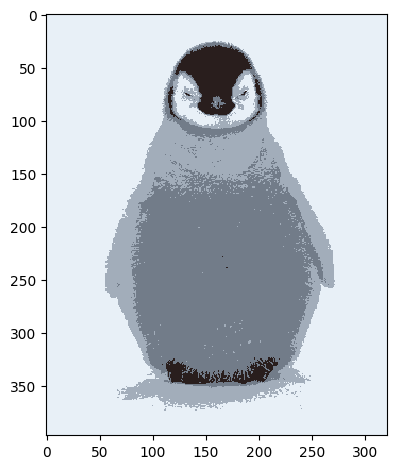

N of colors: 2
Image: 


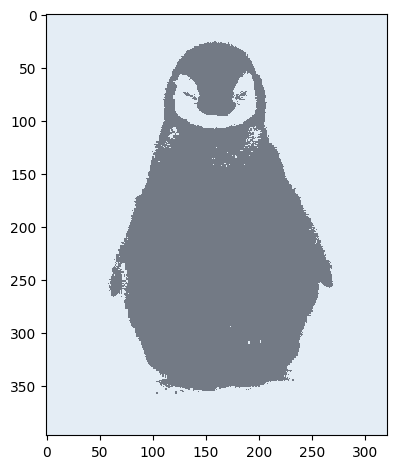

In [281]:
for n in n_colors:
    print("N of colors: " + str(n))
    
    pic_train = shuffle(pic_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n, random_state=0).fit(pic_train)
    prediction = kmeans.predict(pic_array)

    print("Image: ")
    io.imshow(kmeans.cluster_centers_[prediction].reshape(w, h, -1))
    plt.show()

# Processing and classification of text data

In [282]:
texts = pd.read_csv("Poem_classification .csv")
texts.head()

,Genre,Poem
0,Music,A woman walks by the bench I’m sitting onwith ...
1,Music,"Because I am a boy, the untouchability of beau..."
2,Music,"Because today we did not leave this world,We n..."
3,Music,"Big Bend has been here, been here. Shouldn’t i..."
4,Music,"I put shells there, along the lip of the road...."


In [283]:
from textblob import TextBlob


def correct_sentence_spelling(sentence):
    
    sentence = TextBlob(sentence)
    
    result = sentence.correct()
    
    return result


texts['Poem'] = texts['Poem'].apply(correct_sentence_spelling)

display(texts)

,Genre,Poem
0,Music,"(A, , w, o, m, a, n, , w, a, l, k, s, , b, ..."
1,Music,"(B, e, c, a, u, s, e, , I, , a, m, , a, , ..."
2,Music,"(B, e, c, a, u, s, e, , t, o, d, a, y, , w, ..."
3,Music,"(F, i, g, , E, n, d, , h, a, s, , b, e, e, ..."
4,Music,"(I, , p, u, t, , s, h, e, l, l, s, , t, h, ..."
...,...,...
981,Environment,"(W, h, y, , m, a, k, e, , s, o, , m, u, c, ..."
982,Environment,"(W, o, m, a, n, ,, , I, , w, i, s, h, , I, ..."
983,Environment,"(W, o, n, d, e, r, , t, o, , t, h, e, , r, ..."
984,Environment,"(Y, o, u, , c, o, m, e, , t, o, , f, e, t, ..."


In [284]:
print('Classes: ', texts['Genre'].unique())
print(texts.groupby(["Genre"]).count())

Classes:  ['Music' 'Death' 'Affection' 'Environment']
             Poem
Genre            
Affection     241
Death         244
Environment   252
Music         249


In [285]:
data = texts.replace({'Environment':0,'Music':1,'Death':2,'Affection':3})


In [286]:
data = data[data["Genre"] != 2 ]
data = data[data["Genre"] != 3 ]
print('Classes: ', data['Genre'].unique())

Classes:  [1 0]


In [287]:
stop_words = stopwords.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [288]:
result = pd.concat([data['Genre'], data['Poem'].str.lower()], axis=1)
lower_case=pd.DataFrame(result)
display(lower_case)


,Genre,Poem
0,1,"(a, , w, o, m, a, n, , w, a, l, k, s, , b, ..."
1,1,"(b, e, c, a, u, s, e, , i, , a, m, , a, , ..."
2,1,"(b, e, c, a, u, s, e, , t, o, d, a, y, , w, ..."
3,1,"(f, i, g, , e, n, d, , h, a, s, , b, e, e, ..."
4,1,"(i, , p, u, t, , s, h, e, l, l, s, , t, h, ..."
...,...,...
981,0,"(w, h, y, , m, a, k, e, , s, o, , m, u, c, ..."
982,0,"(w, o, m, a, n, ,, , i, , w, i, s, h, , i, ..."
983,0,"(w, o, n, d, e, r, , t, o, , t, h, e, , r, ..."
984,0,"(y, o, u, , c, o, m, e, , t, o, , f, e, t, ..."


In [297]:
punctuation = string.punctuation+'’'+"—"+'“'+'”'+'–'+'1234567890'
remove_punctuation=[ ''.join([c if c not in punctuation else ' ' for c in text])  for text in lower_case['Poem']]
lower_case['Poem']=remove_punctuation
remove_punctuation=lower_case
display(remove_punctuation)

,Genre,Poem
0,1,woman walk bench sitting dog look part cab par...
1,1,boy untouchability beauty subject already book...
2,1,today leave world embody prominence within eve...
3,1,fig end say mountain wall must river never wal...
4,1,put shell along lip road valve last summer din...
...,...,...
981,0,make much fragmentary blue bird butterfly flow...
982,0,woman wish know name could silence house front...
983,0,wonder risk beside creek saddle swift casque t...
984,0,come fetch work night supper table see leave b...


In [298]:
remove_punctuation['Poem'] = remove_punctuation['Poem'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
remove_stopwords=remove_punctuation
display(remove_stopwords)

,Genre,Poem
0,1,woman walk bench sitting dog look part cab par...
1,1,boy untouchability beauty subject already book...
2,1,today leave world embody prominence within eve...
3,1,fig end say mountain wall must river never wal...
4,1,put shell along lip road valve last summer din...
...,...,...
981,0,make much fragmentary blue bird butterfly flow...
982,0,woman wish know name could silence house front...
983,0,wonder risk beside creek saddle swift casque t...
984,0,come fetch work night supper table see leave b...


Text(0.5, 1.0, 'Word Cloud on uncleaned text')

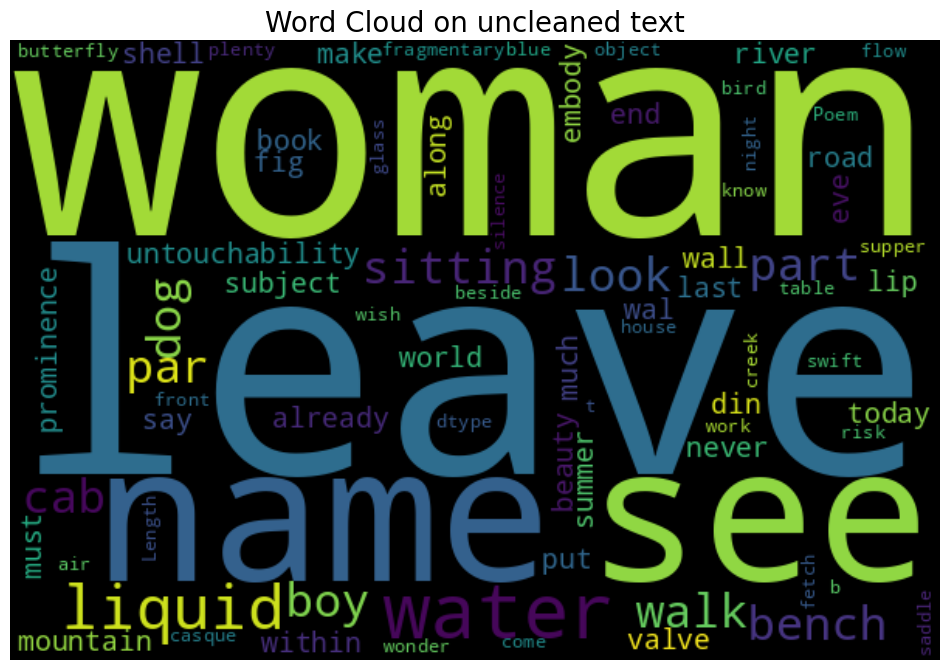

In [299]:
normalize_data=remove_stopwords

cloud=WordCloud(width=600,height=400).generate(str(normalize_data["Poem"]))
fig=plt.figure(figsize=(12,12))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.title("Word Cloud on uncleaned text", size = 20)

In [301]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_words(text):
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)


normalize_data['Poem'] = normalize_data['Poem'].apply(lemmatize_words)

display(normalize_data)

,Genre,Poem
0,1,woman walk bench sitting dog look part cab par...
1,1,boy untouchability beauty subject already book...
2,1,today leave world embody prominence within eve...
3,1,fig end say mountain wall must river never wal...
4,1,put shell along lip road valve last summer din...
...,...,...
981,0,make much fragmentary blue bird butterfly flow...
982,0,woman wish know name could silence house front...
983,0,wonder risk beside creek saddle swift casque t...
984,0,come fetch work night supper table see leave b...


In [302]:
import nltk
words = set(nltk.corpus.words.words())

def clean_sent(sent):
    return " ".join(w for w in nltk.wordpunct_tokenize(sent) if w.lower() in words or not w.isalpha())

normalize_data['Poem'] = normalize_data['Poem'].apply(clean_sent)

display(normalize_data)

,Genre,Poem
0,1,woman walk bench sitting dog look part cab par...
1,1,boy untouchability beauty subject already book...
2,1,today leave world embody prominence within eve...
3,1,fig end say mountain wall must river never wal...
4,1,put shell along lip road valve last summer din...
...,...,...
981,0,make much fragmentary blue bird butterfly flow...
982,0,woman wish know name could silence house front...
983,0,wonder risk beside creek saddle swift casque t...
984,0,come fetch work night supper table see leave b...


In [303]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(lower_case['Poem'])
y = lower_case['Genre']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.7,random_state=0)

In [304]:
abc = AdaBoostClassifier(n_estimators=36)
model = abc.fit(X_train, Y_train)
y_pred = model.predict(X_test)

print("Accuracy: " + str(accuracy_score(Y_test, y_pred)))
print(classification_report(Y_test, y_pred)) 
print("Confusion Matrix:")
print(confusion_matrix(Y_test,y_pred)) 

Accuracy: 0.6026490066225165
              precision    recall  f1-score   support

           0       0.63      0.50      0.56        76
           1       0.58      0.71      0.64        75

    accuracy                           0.60       151
   macro avg       0.61      0.60      0.60       151
weighted avg       0.61      0.60      0.60       151

Confusion Matrix:
[[38 38]
 [22 53]]


In [305]:

forest = RandomForestClassifier (criterion='entropy', n_estimators = 59)
forest.fit(X_train, Y_train) 
y_pred = forest.predict(X_test)

print("Accuracy: " + str(accuracy_score(Y_test, y_pred)))
print(classification_report(Y_test, y_pred)) 
print("Confusion Matrix:")
print(confusion_matrix(Y_test,y_pred)) 


Accuracy: 0.6887417218543046
              precision    recall  f1-score   support

           0       0.70      0.67      0.68        76
           1       0.68      0.71      0.69        75

    accuracy                           0.69       151
   macro avg       0.69      0.69      0.69       151
weighted avg       0.69      0.69      0.69       151

Confusion Matrix:
[[51 25]
 [22 53]]
